In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas dataframe
df = pd.read_csv('model.csv')

# Check the first 5 rows of the dataset
df.head()

,ADM_RATE_ALL,SAT_AVG_ALL,UGDS,UGDS_BLACK,UGDS_ASIAN,UG25ABV,IRPS_WHITE,IRPS_ASIAN,IRPS_BLACK,FTFTPCTFLOAN,...,INEXPFTE,AVGFACSAL,PCTPELL,COST4,NPT4,TUITIONFEE1_IN,TUITIONFEE1_OUT,C100_4,C150_4,C200_4
0,0.6538,850.0,4348.0,0.9216,0.0018,0.0859,0.1220,0.0650,0.7033,0.8063,...,7941.0,7017.0,0.7249,20809.0,13435.0,9366.0,17136.0,0.3265,0.3081,0.3265
1,0.6043,1147.0,11269.0,0.2541,0.0595,0.2363,0.7271,0.1473,0.0569,0.5387,...,17548.0,10221.0,0.3505,22232.0,16023.0,7766.0,17654.0,0.5661,0.5462,0.5661
2,0.8120,1221.0,5829.0,0.1230,0.0381,0.2255,0.7227,0.1558,0.0405,0.4370,...,10619.0,9514.0,0.3179,20999.0,18661.0,9128.0,20622.0,0.5257,0.4935,0.5257
3,0.4639,844.0,4740.0,0.9251,0.0032,0.0974,0.2154,0.1038,0.5423,0.8137,...,7742.0,7940.0,0.7567,18100.0,13865.0,8720.0,15656.0,0.2865,0.2754,0.2865
4,0.5359,1181.0,31005.0,0.1092,0.0113,0.0810,0.7907,0.0663,0.0572,0.4254,...,10312.0,9710.0,0.2009,27205.0,20575.0,10170.0,25950.0,0.6890,0.6709,0.6890


In [3]:
features = [
    "FTFTPCTPELL",
    "SAT_AVG_ALL",
    "TUITIONFEE1_OUT",
    "DEBT_MDN",
    "UG25ABV",
    "AVGFACSAL",
    "UGDS",
    "COST4",
    "ADM_RATE_ALL",
    "UGDS_ASIAN"
]


In [4]:
df.shape

(3673, 25)

In [5]:
#importing necessary libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Separate the features and target variables
X = df[features]
y = df[['C100_4', 'C150_4', 'C200_4']]

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions on training and testing data
y_test_pred = reg.predict(X_test)
y_train_pred= reg.predict(X_train)


# Calculate metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Set:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2) Score:", r2_train)
print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2) Score:", r2_test)



Training Set:
Mean Squared Error (MSE): 0.007738909802642908
R-squared (R2) Score: 0.7559189308824589

Testing Set:
Mean Squared Error (MSE): 0.007898636363365774
R-squared (R2) Score: 0.7477236921526527


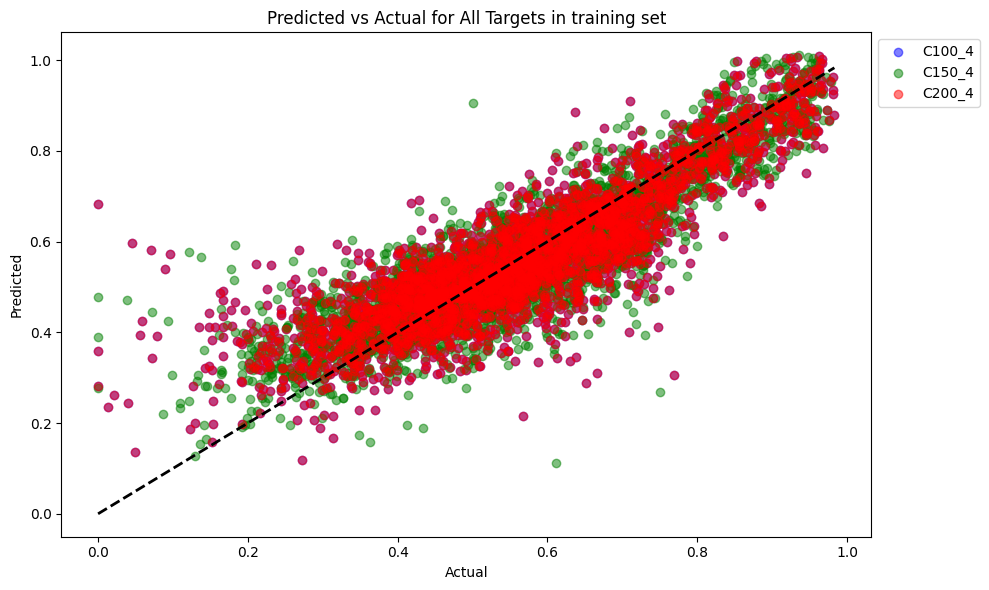

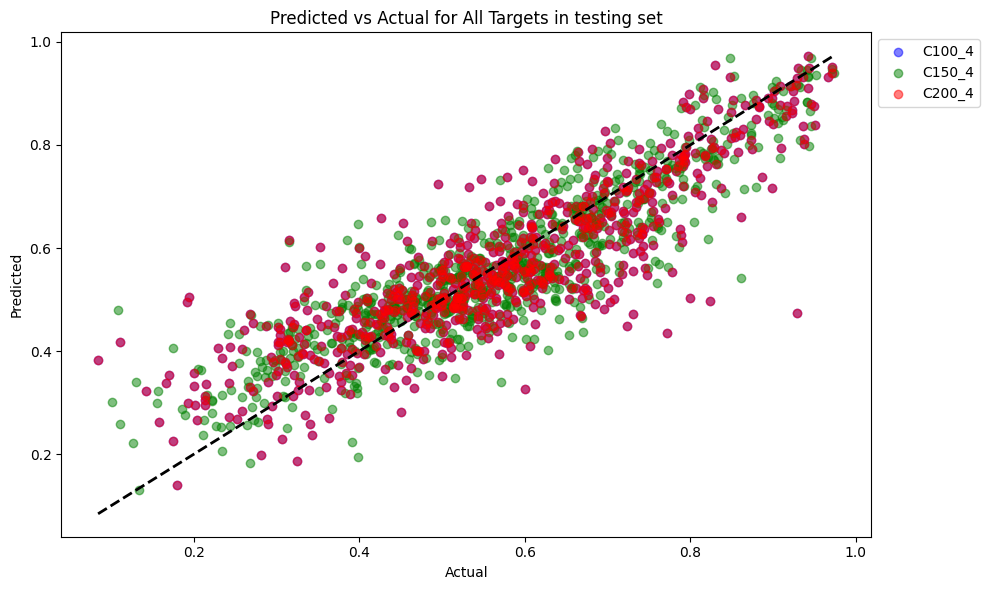

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_train, y_train_pred, y_test, and y_test_pred are defined as in your context

# Plot the predictions vs actual values in a single graph for training set
colors = ['blue', 'green', 'red']  # New color scheme
titles = ['C100_4', 'C150_4', 'C200_4']

plt.figure(figsize=(10, 6))

for i, color in enumerate(colors):
    plt.scatter(y_train.iloc[:, i], y_train_pred[:, i], alpha=0.5, c=color, label=titles[i])

# Create an ideal prediction line
min_val = np.min(y_train.values)
max_val = np.max(y_train.values)

plt.plot([min_val, max_val], [min_val, max_val], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual for All Targets in training set')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position

plt.tight_layout()
plt.show()


# Plot the predictions vs actual values in a single graph for testing set
plt.figure(figsize=(10, 6))

for i, color in enumerate(colors):
    plt.scatter(y_test.iloc[:, i], y_test_pred[:, i], alpha=0.5, c=color, label=titles[i])

# Create an ideal prediction line
min_val = np.min(y_test.values)
max_val = np.max(y_test.values)

plt.plot([min_val, max_val], [min_val, max_val], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual for All Targets in testing set')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position

plt.tight_layout()
plt.show()


In [13]:
from sklearn.linear_model import Lasso

alpha_value = 50  # You can adjust this based on your needs
lasso_reg = Lasso(alpha=alpha_value, max_iter=20)  # Increasing max_iter might be necessary for convergence
lasso_reg.fit(X_train_poly, y_train)

y_train_pred = lasso_reg.predict(X_train_poly)
y_test_pred = lasso_reg.predict(X_test_poly)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Polynomial Lasso Regression - Training Set:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2) Score:", r2_train)

print("\nPolynomial Lasso Regression - Testing Set:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2) Score:", r2_test)



Polynomial Lasso Regression - Training Set:
Mean Squared Error (MSE): 0.006853137838103548
R-squared (R2) Score: 0.7838350758306566

Polynomial Lasso Regression - Testing Set:
Mean Squared Error (MSE): 0.007192555269907014
R-squared (R2) Score: 0.7702692962550698


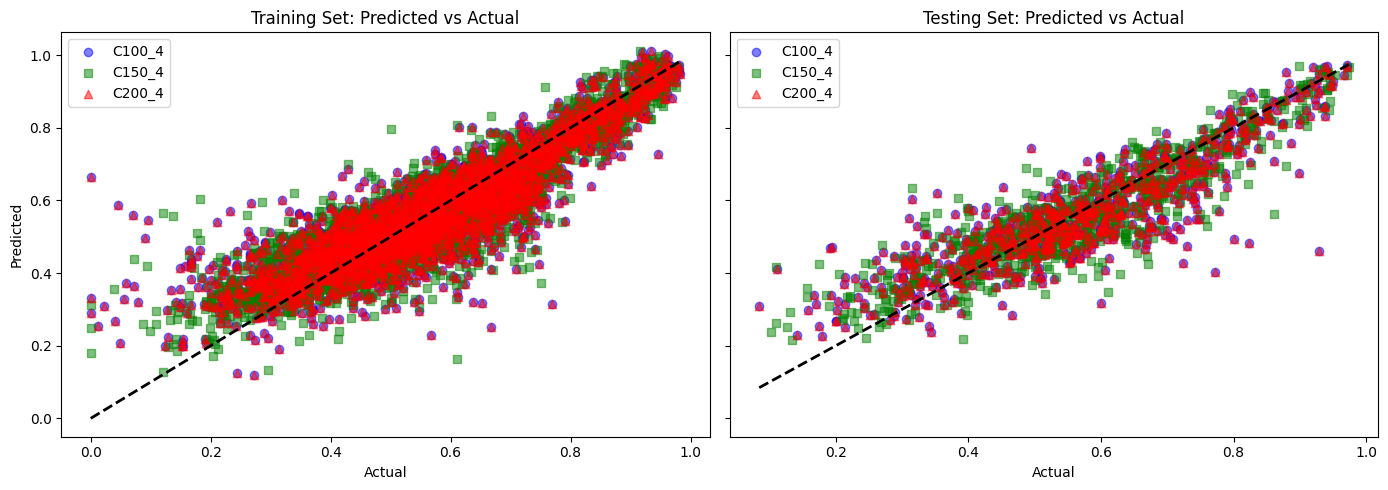

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors and markers
colors = ['blue', 'green', 'red']  # Colors for each target variable
titles = ['C100_4', 'C150_4', 'C200_4']  # Titles for the legend
markers = ['o', 's', '^']  # Different markers for each target variable (circle, square, triangle)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot training set predictions vs actual values
for i, (color, marker) in enumerate(zip(colors, markers)):
    axs[0].scatter(y_train.iloc[:, i], y_train_pred[:, i], alpha=0.5, c=color, marker=marker, label=titles[i])

# Create an ideal prediction line for training set
min_val_train = np.min(y_train.values)
max_val_train = np.max(y_train.values)
axs[0].plot([min_val_train, max_val_train], [min_val_train, max_val_train], '--k', linewidth=2)

axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Training Set: Predicted vs Actual')
axs[0].legend()

# Plot testing set predictions vs actual values
for i, (color, marker) in enumerate(zip(colors, markers)):
    axs[1].scatter(y_test.iloc[:, i], y_test_pred[:, i], alpha=0.5, c=color, marker=marker, label=titles[i])

# Create an ideal prediction line for testing set
min_val_test = np.min(y_test.values)
max_val_test = np.max(y_test.values)
axs[1].plot([min_val_test, max_val_test], [min_val_test, max_val_test], '--k', linewidth=2)

axs[1].set_xlabel('Actual')
axs[1].set_title('Testing Set: Predicted vs Actual')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2938, 10)
(735, 10)
(2938, 3)
(735, 3)


# Decision Trees

In [31]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('model.csv')

# Check the first 5 rows of the dataset
df.head()

,ADM_RATE_ALL,SAT_AVG_ALL,UGDS,UGDS_BLACK,UGDS_ASIAN,UG25ABV,IRPS_WHITE,IRPS_ASIAN,IRPS_BLACK,FTFTPCTFLOAN,...,INEXPFTE,AVGFACSAL,PCTPELL,COST4,NPT4,TUITIONFEE1_IN,TUITIONFEE1_OUT,C100_4,C150_4,C200_4
0,0.6538,850.0,4348.0,0.9216,0.0018,0.0859,0.1220,0.0650,0.7033,0.8063,...,7941.0,7017.0,0.7249,20809.0,13435.0,9366.0,17136.0,0.3265,0.3081,0.3265
1,0.6043,1147.0,11269.0,0.2541,0.0595,0.2363,0.7271,0.1473,0.0569,0.5387,...,17548.0,10221.0,0.3505,22232.0,16023.0,7766.0,17654.0,0.5661,0.5462,0.5661
2,0.8120,1221.0,5829.0,0.1230,0.0381,0.2255,0.7227,0.1558,0.0405,0.4370,...,10619.0,9514.0,0.3179,20999.0,18661.0,9128.0,20622.0,0.5257,0.4935,0.5257
3,0.4639,844.0,4740.0,0.9251,0.0032,0.0974,0.2154,0.1038,0.5423,0.8137,...,7742.0,7940.0,0.7567,18100.0,13865.0,8720.0,15656.0,0.2865,0.2754,0.2865
4,0.5359,1181.0,31005.0,0.1092,0.0113,0.0810,0.7907,0.0663,0.0572,0.4254,...,10312.0,9710.0,0.2009,27205.0,20575.0,10170.0,25950.0,0.6890,0.6709,0.6890


In [32]:
X=df.drop(columns=['C100_4','C150_4','C200_4'])
y=df[['C100_4','C150_4','C200_4']]

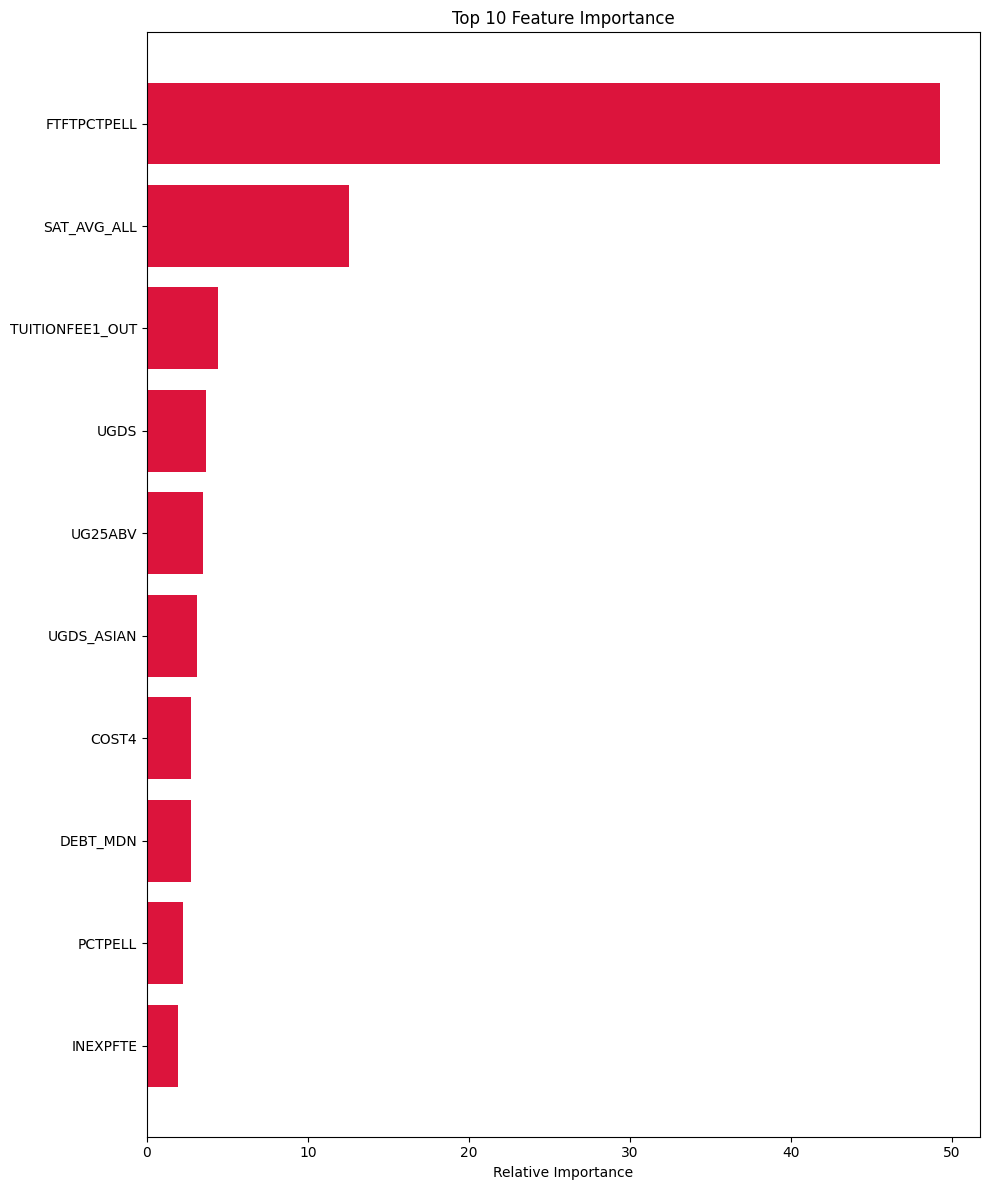

In [33]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

# Instantiating the tree regressor
tr_reg = DecisionTreeRegressor() 

# Fitting the data
tr_reg.fit(X, y) 

# Calculating the feature importance
feature_importance = tr_reg.feature_importances_

# Normalizing the feature importance
feature_importance = 100.0 * (feature_importance / feature_importance.sum())

# Sorting the indices based on importance score
sorted_idx = np.argsort(feature_importance)[-10:]  # Select only the top 10 features

# Plotting
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(10, 12))
plt.title("Top 10 Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")

# Assuming you have the feature names stored in X.columns
plt.yticks(pos, X.columns[sorted_idx])

plt.tight_layout()
plt.show()


In [28]:
X = df[top_10_features]


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [5,7,9,10,11,12,13],
    'min_samples_split': [50,60,75,80,85,90,95,100,150,200,300,350],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30]
}

# Instantiate a DecisionTreeRegressor
tree = DecisionTreeRegressor()

# Instantiate the GridSearchCV object and fit to the data
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_tree = grid_search.best_estimator_

print("Best parameters found: ", best_params)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_split': 60}
Best cross-validation score: -0.01


In [24]:
# Instantiate the DecisionTreeRegressor with best parameters
tree_reg = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=60,
    
)

# Fit the model to your data
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=10, min_samples_split=60)

In [25]:
# Make predictions on training and testing data
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

# Calculate metrics for training data (if desired)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data (if desired)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Decision Tree Regression - Training Set:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2) Score:", r2_train)

print("\nDecision Tree Regression - Testing Set:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2) Score:", r2_test)


Decision Tree Regression - Training Set:
Mean Squared Error (MSE): 0.005214328737395629
R-squared (R2) Score: 0.8355776478759672

Decision Tree Regression - Testing Set:
Mean Squared Error (MSE): 0.005772988401405406
R-squared (R2) Score: 0.8156865973406546


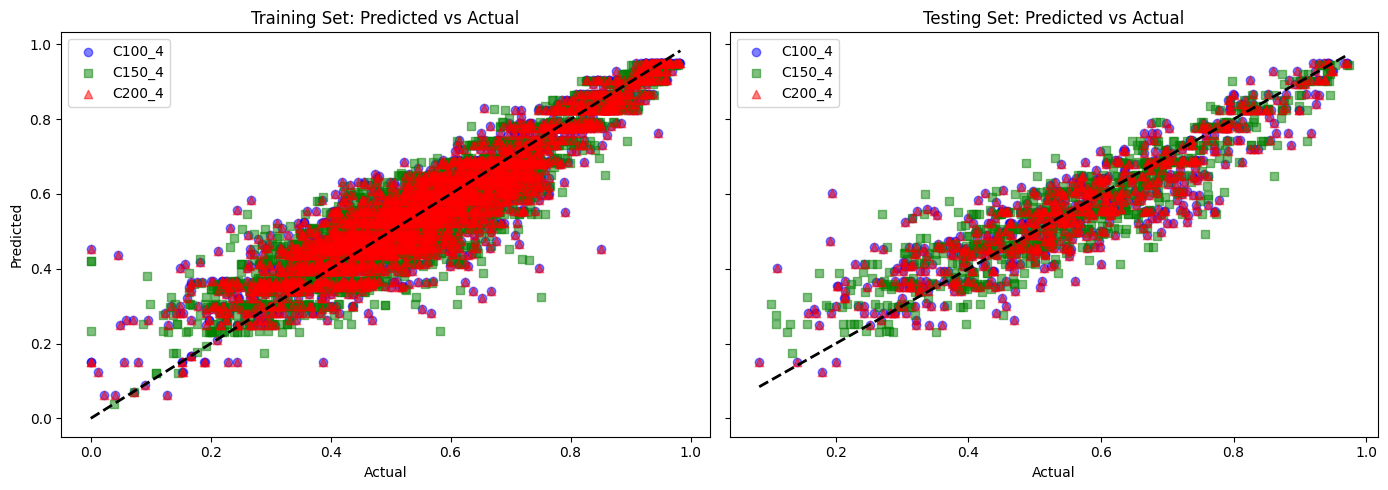

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors and markers
colors = ['blue', 'green', 'red']  # Colors for each target variable
titles = ['C100_4', 'C150_4', 'C200_4']  # Titles for the legend
markers = ['o', 's', '^']  # Different markers for each target variable (circle, square, triangle)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot training set predictions vs actual values
for i, (color, marker) in enumerate(zip(colors, markers)):
    axs[0].scatter(y_train.iloc[:, i], y_train_pred[:, i], alpha=0.5, c=color, marker=marker, label=titles[i])

# Create an ideal prediction line for training set
min_val_train = np.min(y_train.values)
max_val_train = np.max(y_train.values)
axs[0].plot([min_val_train, max_val_train], [min_val_train, max_val_train], '--k', linewidth=2)

axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Training Set: Predicted vs Actual')
axs[0].legend()

# Plot testing set predictions vs actual values
for i, (color, marker) in enumerate(zip(colors, markers)):
    axs[1].scatter(y_test.iloc[:, i], y_test_pred[:, i], alpha=0.5, c=color, marker=marker, label=titles[i])

# Create an ideal prediction line for testing set
min_val_test = np.min(y_test.values)
max_val_test = np.max(y_test.values)
axs[1].plot([min_val_test, max_val_test], [min_val_test, max_val_test], '--k', linewidth=2)

axs[1].set_xlabel('Actual')
axs[1].set_title('Testing Set: Predicted vs Actual')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


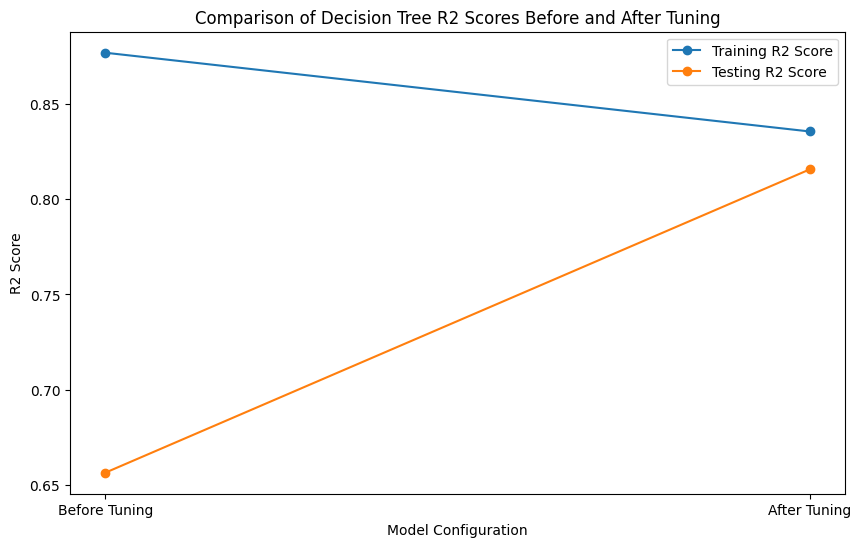

In [36]:
import matplotlib.pyplot as plt

# Data before tuning
r2_scores_before = {
    "Training": 0.8769173982194495,
    "Testing": 0.6564439477334899
}

# Data after tuning
r2_scores_after = {
    "Training": 0.8355776478759672,
    "Testing": 0.8156865973406546
}

# Lists for plotting
settings = ["Before Tuning", "After Tuning"]
training_scores = [r2_scores_before["Training"], r2_scores_after["Training"]]
testing_scores = [r2_scores_before["Testing"], r2_scores_after["Testing"]]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(settings, training_scores, label="Training R2 Score", marker='o')
plt.plot(settings, testing_scores, label="Testing R2 Score", marker='o')

# Adding titles and labels
plt.title("Comparison of Decision Tree R2 Scores Before and After Tuning")
plt.xlabel("Model Configuration")
plt.ylabel("R2 Score")
plt.legend()

# Show the plot
plt.show()


# Random Forest Regressor 


In [40]:
features = [
    "FTFTPCTPELL",
    "SAT_AVG_ALL",
    "TUITIONFEE1_OUT",
    "DEBT_MDN",
    "UG25ABV",
    "AVGFACSAL",
    "UGDS",
    "COST4",
    "ADM_RATE_ALL",
    "UGDS_ASIAN"
]


In [41]:

# Separate the features and target variables
X = df[features]
y = df[['C100_4', 'C150_4', 'C200_4']]

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Existing code for setting up and training the RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3)
rf_reg.fit(X_train, y_train)

# GridSearchCV to find best hyperparameters
param_grid = {
    'n_estimators': [50,100,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [7,9,10, 12,],
    'min_samples_split': [20,25,30,35,40,45,50],
    'min_samples_leaf': [25,30,40,50]
}

grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Evaluating the model with best parameters
best_rf = grid_search.best_estimator_

train_y_pred_best = best_rf.predict(X_train)
test_y_pred_best = best_rf.predict(X_test)

r2_train_score_best = best_rf.score(X_train, y_train)
r2_test_score_best = best_rf.score(X_test, y_test)

mse_train_best = mean_squared_error(y_train, train_y_pred_best)
mse_test_best = mean_squared_error(y_test, test_y_pred_best)

print("Best parameters found: ", grid_search.best_params_)
print('R^2 score for train dataset with best parameters = ', round(r2_train_score_best, 4))
print('R^2 score for test dataset with best parameters = ', round(r2_test_score_best, 4))
print("Mean Squared Error for train with best parameters:", mse_train_best)
print("Mean Squared Error for test with best parameters:", mse_test_best)


Fitting 5 folds for each of 1008 candidates, totalling 5040 fits
Best parameters found:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 25, 'min_samples_split': 20, 'n_estimators': 150}
R^2 score for train dataset with best parameters =  0.8115
R^2 score for test dataset with best parameters =  0.7644
Mean Squared Error for train with best parameters: 0.005975731734225831
Mean Squared Error for test with best parameters: 0.007376100238084147


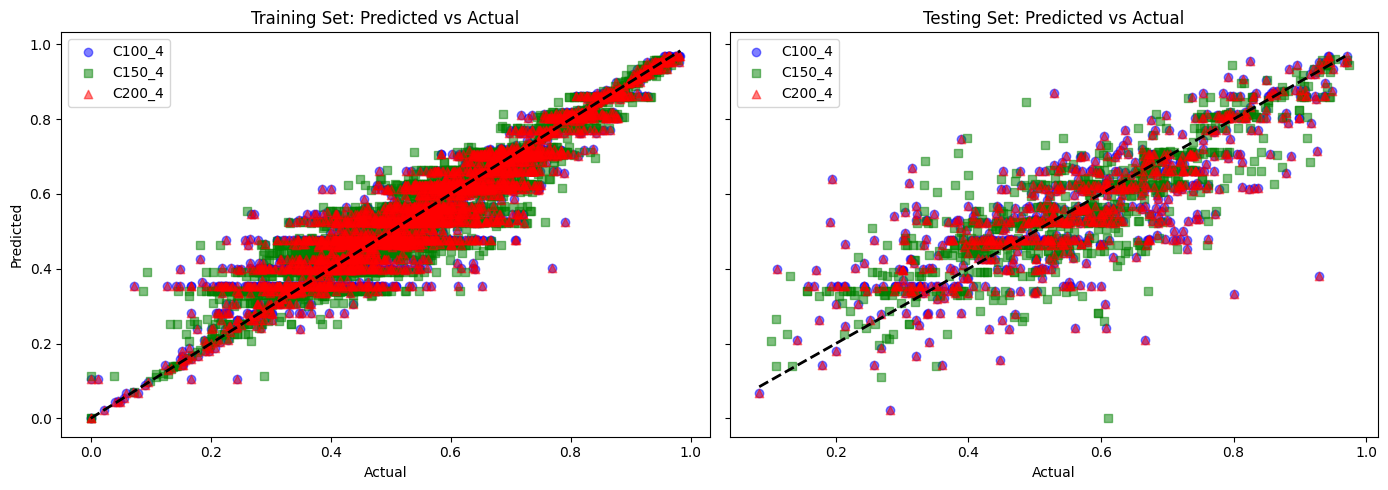

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors and markers
colors = ['blue', 'green', 'red']  # Colors for each target variable
titles = ['C100_4', 'C150_4', 'C200_4']  # Titles for the legend
markers = ['o', 's', '^']  # Different markers for each target variable (circle, square, triangle)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot training set predictions vs actual values
for i, (color, marker) in enumerate(zip(colors, markers)):
    axs[0].scatter(y_train.iloc[:, i], y_train_pred[:, i], alpha=0.5, c=color, marker=marker, label=titles[i])

# Create an ideal prediction line for training set
min_val_train = np.min(y_train.values)
max_val_train = np.max(y_train.values)
axs[0].plot([min_val_train, max_val_train], [min_val_train, max_val_train], '--k', linewidth=2)

axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Training Set: Predicted vs Actual')
axs[0].legend()

# Plot testing set predictions vs actual values
for i, (color, marker) in enumerate(zip(colors, markers)):
    axs[1].scatter(y_test.iloc[:, i], y_test_pred[:, i], alpha=0.5, c=color, marker=marker, label=titles[i])

# Create an ideal prediction line for testing set
min_val_test = np.min(y_test.values)
max_val_test = np.max(y_test.values)
axs[1].plot([min_val_test, max_val_test], [min_val_test, max_val_test], '--k', linewidth=2)

axs[1].set_xlabel('Actual')
axs[1].set_title('Testing Set: Predicted vs Actual')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# LSTM 


In [59]:
df=pd.read_csv('consistent_universities.csv')

In [60]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from tqdm.autonotebook import tqdm
import time

# Importing some basic modules in torch

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import BatchSampler, Dataset, DataLoader

In [61]:
def moveTo(obj, device):
    if isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    elif isinstance(obj, tuple):
        return tuple(moveTo(list(obj), device))
    elif isinstance(obj, set):
        return set(moveTo(list(obj), device))
    elif isinstance(obj, dict):
        to_ret = dict()
        for key, value in obj.items():
            to_ret[moveTo(key, device)] = moveTo(value, device)
        return to_ret
    elif hasattr(obj, "to"):
        return obj.to(device)
    else:
        return obj

In [62]:
import time
import numpy as np
from tqdm import tqdm

def run_epoch(model, optimizer, data_loader, loss_func, device, results, score_funcs, prefix="", desc=None):
    running_loss = []
    y_true = []
    y_pred = []
    start = time.time()
    for inputs, labels in tqdm(data_loader, desc=desc,leave=True):
        inputs = moveTo(inputs, device)
        labels = moveTo(labels, device)

        y_hat = model(inputs)
        loss = loss_func(y_hat, labels)

        if model.training:
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        running_loss.append(loss.item())

        if len(score_funcs) > 0 and isinstance(labels, torch.Tensor):
            labels = labels.detach().cpu().numpy()
            y_hat = y_hat.detach().cpu().numpy()
            y_true.extend(labels.tolist())
            y_pred.extend(y_hat.tolist())

    end = time.time()

    y_pred = np.asarray(y_pred)
    results[prefix + " loss"].append(np.mean(running_loss))
    for name, score_func in score_funcs.items():
        try:
            results[prefix + " " + name].append(score_func(y_true, y_pred))
        except:
            results[prefix + " " + name].append(score_func(y_true, np.argmax(y_pred, axis=1)))

    return end - start



In [63]:
sequences = []
targets = []

for university in df['INSTNM'].unique():
    university_data = df[df['INSTNM'] == university].sort_values(by='YEAR')
    if len(university_data) == 10:  # Ensuring we have 10 years of data for each university
        sequence = university_data.drop(['YEAR', 'INSTNM', 'C100_4', 'C150_4', 'C200_4'], axis=1)
        target = university_data[['C100_4', 'C150_4', 'C200_4']]
        sequences.append(sequence.values)
        targets.append(target.values)

# Convert lists to numpy arrays for LSTM input
X = np.array(sequences)  # Shape: (number_of_universities, 10, 9)
Y = np.array(targets)    # Shape: (number_of_universities, 10, 3)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [65]:
from sklearn.preprocessing import StandardScaler

# Assuming your features are in the first 9 columns
scaler = StandardScaler()

# Reshape for scaling
X_train_reshaped = X_train.reshape(-1, 9)
X_train_scaled = scaler.fit_transform(X_train_reshaped).reshape(X_train.shape)

X_test_reshaped = X_test.reshape(-1, 9)
X_test_scaled = scaler.transform(X_test_reshaped).reshape(X_test.shape)

In [66]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert to PyTorch tensors
train_data = TensorDataset(torch.Tensor(X_train_scaled), torch.Tensor(Y_train))
test_data = TensorDataset(torch.Tensor(X_test_scaled), torch.Tensor(Y_test))

# Create dataloaders
batch_size = 64  # You can adjust this
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)


In [67]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Getting the output for each time step
        output, (h_n, c_n) = self.lstm(x)
        # Passing the output of each time step through a linear layer
        # The linear layer maps from the hidden state size to the number of output targets
        output = self.linear(output)
        return output

# Assuming the rest of your model initialization code remains the same


# Instantiate the model
input_size = 9  # Number of features
hidden_size = 64  # Number of neurons 
num_layers = 3  # Number of stacked LSTM layers
output_size = 3  # Number of output classes

# Move model to the appropriate device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
model.to(device)  # Move model to GPU if available


LSTMModel(
  (lstm): LSTM(9, 64, num_layers=3, batch_first=True)
  (linear): Linear(in_features=64, out_features=3, bias=True)
)

In [68]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01,weight_decay=0.0001)

In [69]:
import torch
import time
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from tqdm import tqdm

def run_epoch(model, optimizer, data_loader, loss_func, device, results, score_funcs, prefix="", desc=None):
    model.train() if prefix == "train" else model.eval()
    running_loss = []
    y_true = []
    y_pred = []

    for inputs, labels in tqdm(data_loader, desc=desc, leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = loss_func(outputs, labels)

        # Backward and optimize for training phase
        if model.training:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        running_loss.append(loss.item())
        y_true.extend(labels.detach().cpu().numpy().reshape(-1, labels.shape[-1]).tolist())
        y_pred.extend(outputs.detach().cpu().numpy().reshape(-1, outputs.shape[-1]).tolist())

    # Recording results
    avg_loss = sum(running_loss) / len(running_loss)
    results[prefix + " loss"].append(avg_loss)
    for name, score_func in score_funcs.items():
        score = score_func(y_true, y_pred, multioutput='uniform_average')
        results[prefix + " " + name].append(score)

def train_simple_network_alt(model, optimizer, loss_func, train_loader, test_loader, score_funcs, epochs, device):
    results = {"epoch": [], "total time": [], "train loss": [], "test loss": []}
    for name in score_funcs:
        results["train " + name] = []
        results["test " + name] = []

    total_train_time = 0

    for epoch in range(1, epochs + 1):
        start_time = time.time()

        # Train and test for one epoch
        run_epoch(model, optimizer, train_loader, loss_func, device, results, score_funcs, "train", f"Training Epoch {epoch}")
        run_epoch(model, optimizer, test_loader, loss_func, device, results, score_funcs, "test", f"Testing Epoch {epoch}")

        epoch_time = time.time() - start_time
        total_train_time += epoch_time

        results["epoch"].append(epoch)
        results["total time"].append(total_train_time)

        print(f"Epoch {epoch}/{epochs} - Train Loss: {results['train loss'][-1]:.4f}, Test Loss: {results['test loss'][-1]:.4f}")

    return pd.DataFrame.from_dict(results)


In [74]:
# Define the score functions
score_funcs = {
    'MSE': mean_squared_error,
    'R2': r2_score
}

# Train the LSTM model
lstm_results = train_simple_network_alt(
    model, optimizer, loss_func, train_loader, test_loader,
    score_funcs, epochs=100, device=device
)

Epoch 1/100 - Train Loss: 0.0054, Test Loss: 0.0058


Epoch 2/100 - Train Loss: 0.0053, Test Loss: 0.0061


Epoch 3/100 - Train Loss: 0.0051, Test Loss: 0.0054


Epoch 4/100 - Train Loss: 0.0052, Test Loss: 0.0061


Epoch 5/100 - Train Loss: 0.0053, Test Loss: 0.0055


Epoch 6/100 - Train Loss: 0.0051, Test Loss: 0.0055


Epoch 7/100 - Train Loss: 0.0051, Test Loss: 0.0055


Epoch 8/100 - Train Loss: 0.0050, Test Loss: 0.0053


Epoch 9/100 - Train Loss: 0.0052, Test Loss: 0.0055


Epoch 10/100 - Train Loss: 0.0051, Test Loss: 0.0056


Epoch 11/100 - Train Loss: 0.0050, Test Loss: 0.0056


Epoch 12/100 - Train Loss: 0.0057, Test Loss: 0.0059


Epoch 13/100 - Train Loss: 0.0055, Test Loss: 0.0054


Epoch 14/100 - Train Loss: 0.0051, Test Loss: 0.0056


Epoch 15/100 - Train Loss: 0.0050, Test Loss: 0.0056


Epoch 16/100 - Train Loss: 0.0050, Test Loss: 0.0053


Epoch 17/100 - Train Loss: 0.0050, Test Loss: 0.0053


Epoch 18/100 - Train Loss: 0.0050, Test Loss: 0.0056


Epoch 19/100 - Train Loss: 0.0052, Test Loss: 0.0055


Epoch 20/100 - Train Loss: 0.0051, Test Loss: 0.0060


Epoch 21/100 - Train Loss: 0.0051, Test Loss: 0.0058


Epoch 22/100 - Train Loss: 0.0052, Test Loss: 0.0058


Epoch 23/100 - Train Loss: 0.0051, Test Loss: 0.0053


Epoch 24/100 - Train Loss: 0.0051, Test Loss: 0.0056


Epoch 25/100 - Train Loss: 0.0051, Test Loss: 0.0063


Epoch 26/100 - Train Loss: 0.0054, Test Loss: 0.0054


Epoch 27/100 - Train Loss: 0.0052, Test Loss: 0.0055


Epoch 28/100 - Train Loss: 0.0050, Test Loss: 0.0059


Epoch 29/100 - Train Loss: 0.0051, Test Loss: 0.0058


Epoch 30/100 - Train Loss: 0.0052, Test Loss: 0.0053


Epoch 31/100 - Train Loss: 0.0054, Test Loss: 0.0056


Epoch 32/100 - Train Loss: 0.0052, Test Loss: 0.0055


Epoch 33/100 - Train Loss: 0.0051, Test Loss: 0.0056


Epoch 34/100 - Train Loss: 0.0049, Test Loss: 0.0053


Epoch 35/100 - Train Loss: 0.0049, Test Loss: 0.0054


Epoch 36/100 - Train Loss: 0.0049, Test Loss: 0.0052


Epoch 37/100 - Train Loss: 0.0051, Test Loss: 0.0054


Epoch 38/100 - Train Loss: 0.0049, Test Loss: 0.0055


Epoch 39/100 - Train Loss: 0.0047, Test Loss: 0.0054


Epoch 40/100 - Train Loss: 0.0050, Test Loss: 0.0054


Epoch 41/100 - Train Loss: 0.0050, Test Loss: 0.0055


Epoch 42/100 - Train Loss: 0.0049, Test Loss: 0.0057


Epoch 43/100 - Train Loss: 0.0051, Test Loss: 0.0053


Epoch 44/100 - Train Loss: 0.0050, Test Loss: 0.0059


Epoch 45/100 - Train Loss: 0.0056, Test Loss: 0.0074


Epoch 46/100 - Train Loss: 0.0053, Test Loss: 0.0055


Epoch 47/100 - Train Loss: 0.0051, Test Loss: 0.0054


Epoch 48/100 - Train Loss: 0.0051, Test Loss: 0.0054


Epoch 49/100 - Train Loss: 0.0052, Test Loss: 0.0056


Epoch 50/100 - Train Loss: 0.0052, Test Loss: 0.0065


Epoch 51/100 - Train Loss: 0.0052, Test Loss: 0.0054


Epoch 52/100 - Train Loss: 0.0051, Test Loss: 0.0053


Epoch 53/100 - Train Loss: 0.0050, Test Loss: 0.0055


Epoch 54/100 - Train Loss: 0.0050, Test Loss: 0.0052


Epoch 55/100 - Train Loss: 0.0049, Test Loss: 0.0058


Epoch 56/100 - Train Loss: 0.0052, Test Loss: 0.0056


Epoch 57/100 - Train Loss: 0.0048, Test Loss: 0.0053


Epoch 58/100 - Train Loss: 0.0051, Test Loss: 0.0062


Epoch 59/100 - Train Loss: 0.0051, Test Loss: 0.0055


Epoch 60/100 - Train Loss: 0.0049, Test Loss: 0.0054


Epoch 61/100 - Train Loss: 0.0051, Test Loss: 0.0064


Epoch 62/100 - Train Loss: 0.0054, Test Loss: 0.0054


Epoch 63/100 - Train Loss: 0.0051, Test Loss: 0.0069


Epoch 64/100 - Train Loss: 0.0055, Test Loss: 0.0060


Epoch 65/100 - Train Loss: 0.0053, Test Loss: 0.0057


Epoch 66/100 - Train Loss: 0.0052, Test Loss: 0.0055


Epoch 67/100 - Train Loss: 0.0050, Test Loss: 0.0053


Epoch 68/100 - Train Loss: 0.0051, Test Loss: 0.0055


Epoch 69/100 - Train Loss: 0.0051, Test Loss: 0.0054


Epoch 70/100 - Train Loss: 0.0048, Test Loss: 0.0055


Epoch 71/100 - Train Loss: 0.0050, Test Loss: 0.0061


Epoch 72/100 - Train Loss: 0.0051, Test Loss: 0.0061


Epoch 73/100 - Train Loss: 0.0054, Test Loss: 0.0056


Epoch 74/100 - Train Loss: 0.0050, Test Loss: 0.0055


Epoch 75/100 - Train Loss: 0.0049, Test Loss: 0.0055


Epoch 76/100 - Train Loss: 0.0050, Test Loss: 0.0056


Epoch 77/100 - Train Loss: 0.0051, Test Loss: 0.0053


Epoch 78/100 - Train Loss: 0.0049, Test Loss: 0.0056


Epoch 79/100 - Train Loss: 0.0050, Test Loss: 0.0059


Epoch 80/100 - Train Loss: 0.0053, Test Loss: 0.0062


Epoch 81/100 - Train Loss: 0.0051, Test Loss: 0.0053


Epoch 82/100 - Train Loss: 0.0050, Test Loss: 0.0055


Epoch 83/100 - Train Loss: 0.0051, Test Loss: 0.0055


Epoch 84/100 - Train Loss: 0.0049, Test Loss: 0.0056


Epoch 85/100 - Train Loss: 0.0050, Test Loss: 0.0052


Epoch 86/100 - Train Loss: 0.0049, Test Loss: 0.0057


Epoch 87/100 - Train Loss: 0.0050, Test Loss: 0.0055


Epoch 88/100 - Train Loss: 0.0051, Test Loss: 0.0055


Epoch 89/100 - Train Loss: 0.0050, Test Loss: 0.0054


Epoch 90/100 - Train Loss: 0.0050, Test Loss: 0.0060


Epoch 91/100 - Train Loss: 0.0049, Test Loss: 0.0054


Epoch 92/100 - Train Loss: 0.0049, Test Loss: 0.0056


Epoch 93/100 - Train Loss: 0.0053, Test Loss: 0.0056


Epoch 94/100 - Train Loss: 0.0052, Test Loss: 0.0062


Epoch 95/100 - Train Loss: 0.0051, Test Loss: 0.0053


Epoch 96/100 - Train Loss: 0.0050, Test Loss: 0.0054


Epoch 97/100 - Train Loss: 0.0050, Test Loss: 0.0055


Epoch 98/100 - Train Loss: 0.0050, Test Loss: 0.0055


Epoch 99/100 - Train Loss: 0.0048, Test Loss: 0.0052


Epoch 100/100 - Train Loss: 0.0049, Test Loss: 0.0054


In [75]:
lstm_results[-10:]

,epoch,total time,train loss,test loss,train MSE,test MSE,train R2,test R2
90,91,12.968493,0.004865,0.005381,0.004886,0.005394,0.844028,0.840166
91,92,13.097548,0.004915,0.005583,0.004935,0.005592,0.842472,0.834357
92,93,13.365264,0.005251,0.005618,0.005094,0.005642,0.837394,0.832862
93,94,13.492547,0.005226,0.006210,0.005159,0.006235,0.835307,0.815324
94,95,13.606672,0.005117,0.005257,0.005106,0.005266,0.837016,0.843994
95,96,13.728838,0.005045,0.005407,0.005075,0.005422,0.838015,0.839389
96,97,13.853256,0.004971,0.005482,0.005006,0.005488,0.840220,0.837428
97,98,13.983393,0.005040,0.005533,0.005034,0.005554,0.839325,0.835452
98,99,14.110636,0.004848,0.005167,0.004812,0.005188,0.846388,0.846281
99,100,14.239421,0.004916,0.005417,0.004914,0.005417,0.843140,0.839543


In [72]:
# Function to get model predictions and actual values for 3D targets
def get_predictions_and_actuals(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    actuals = []
    with torch.no_grad():  
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            output = model(inputs)
            predictions.extend(output.cpu().numpy())  
            actuals.extend(labels.cpu().numpy())
    return np.array(predictions), np.array(actuals)

# Get predictions and actuals for train and test sets
train_predictions, train_actuals = get_predictions_and_actuals(model, train_loader, device)
test_predictions, test_actuals = get_predictions_and_actuals(model, test_loader, device)

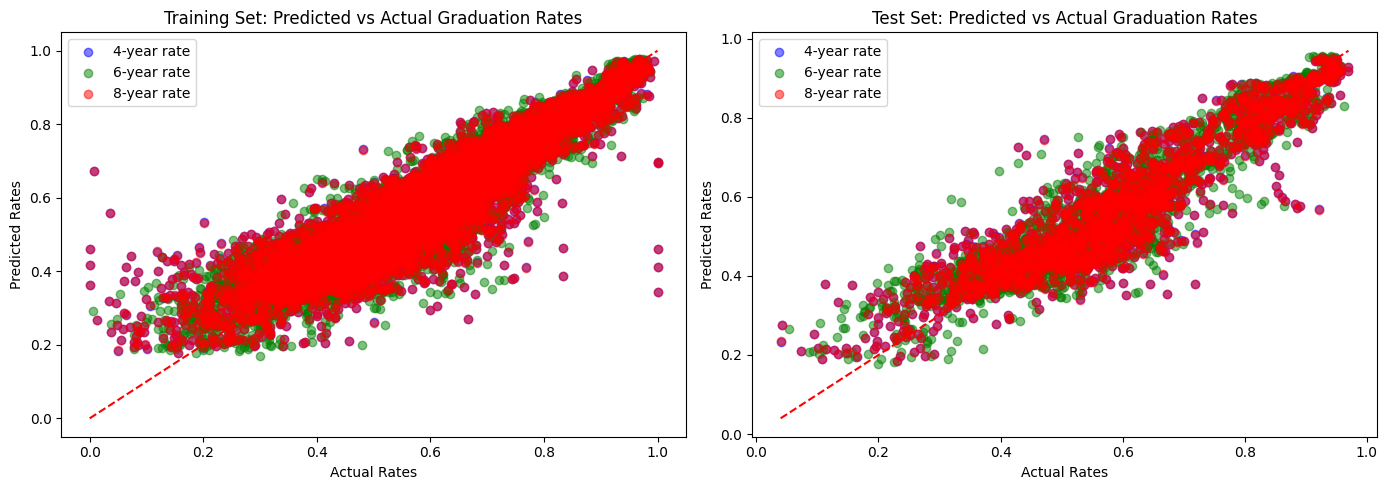

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the predictions and actuals across all samples for each target
train_predictions_flat = train_predictions.reshape(-1, train_predictions.shape[-1])
train_actuals_flat = train_actuals.reshape(-1, train_actuals.shape[-1])
test_predictions_flat = test_predictions.reshape(-1, test_predictions.shape[-1])
test_actuals_flat = test_actuals.reshape(-1, test_actuals.shape[-1])

# Plot settings
colors = ['blue', 'green', 'red']  # Colors for each target
labels = ['4-year rate', '6-year rate', '8-year rate']  # Labels for each target

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plotting for the training set
for i in range(train_predictions_flat.shape[1]):
    ax[0].scatter(train_actuals_flat[:, i], train_predictions_flat[:, i], alpha=0.5, label=labels[i], color=colors[i])
ax[0].plot([train_actuals_flat.min(), train_actuals_flat.max()], 
           [train_actuals_flat.min(), train_actuals_flat.max()], 'r--')  # Diagonal line for reference
ax[0].set_title('Training Set: Predicted vs Actual Graduation Rates')
ax[0].set_xlabel('Actual Rates')
ax[0].set_ylabel('Predicted Rates')
ax[0].legend()

# Plotting for the test set
for i in range(test_predictions_flat.shape[1]):
    ax[1].scatter(test_actuals_flat[:, i], test_predictions_flat[:, i], alpha=0.5, label=labels[i], color=colors[i])
ax[1].plot([test_actuals_flat.min(), test_actuals_flat.max()], 
           [test_actuals_flat.min(), test_actuals_flat.max()], 'r--')  # Diagonal line for reference
ax[1].set_title('Test Set: Predicted vs Actual Graduation Rates')
ax[1].set_xlabel('Actual Rates')
ax[1].set_ylabel('Predicted Rates')
ax[1].legend()

# Showing plot
plt.tight_layout()
plt.show()


LSTM model with 10 years of data gives testing accuracy of around 85 percent, showing no signs of overfitting. This model gives the best results on comparing with all the previous machine learning models.

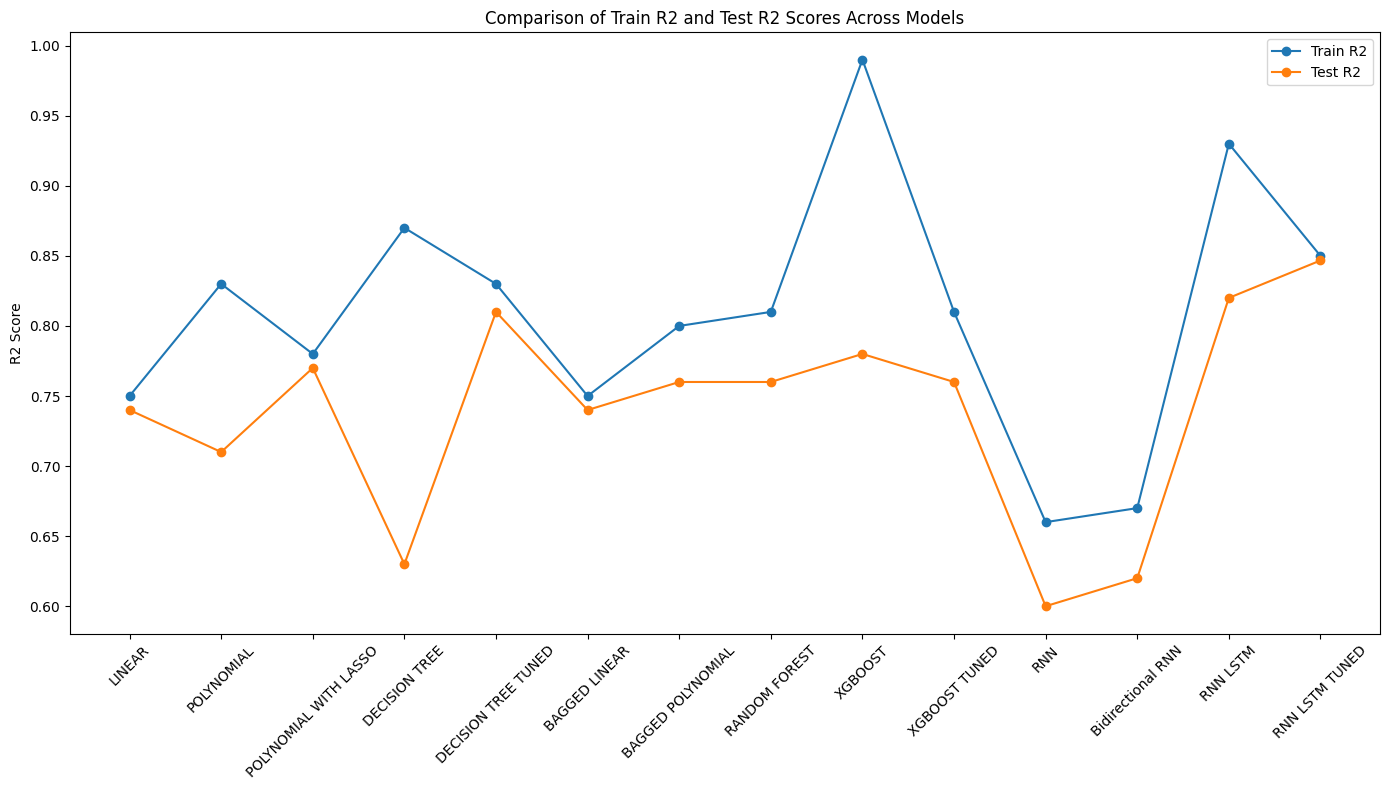

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table provided
models = [
    "LINEAR", "POLYNOMIAL", "POLYNOMIAL WITH LASSO", "DECISION TREE",
    "DECISION TREE TUNED", "BAGGED LINEAR", "BAGGED POLYNOMIAL",
    "RANDOM FOREST", "XGBOOST", "XGBOOST TUNED", "RNN",
    "Bidirectional RNN", "RNN LSTM", "RNN LSTM TUNED"
]
train_r2_values = [
    0.75, 0.83, 0.78, 0.87, 0.83, 0.75, 0.80, 0.81, 0.99, 81, 0.66,
    0.67, 93, 85
]
test_r2_values = [
    0.74, 0.71, 0.77, 0.63, 0.81, 0.74, 0.76, 0.76, 0.78, 76, 0.60,
    0.62, 82, 84.67
]

# Convert percentage values to decimals
train_r2_values = [value if value < 1 else value / 100 for value in train_r2_values]
test_r2_values = [value if value < 1 else value / 100 for value in test_r2_values]

# Create an array for the x-axis positions
x = np.arange(len(models))

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(x, train_r2_values, label='Train R2', marker='o')
plt.plot(x, test_r2_values, label='Test R2', marker='o')

# Adding model names on x-axis
plt.xticks(x, models, rotation=45)

plt.ylabel('R2 Score')
plt.title('Comparison of Train R2 and Test R2 Scores Across Models')
plt.legend()
plt.tight_layout()

plt.show()
